In [1]:
import pandas as pd
import numpy as np
import h5py
import tables
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def pair_article_cluster(filename):
    hf = h5py.File(filename, 'r')
    x1 = hf['unique_IDF']
    ddf = pd.DataFrame()
    cnt = 0
    for key, val in x1.items():
        df = pd.DataFrame()
        x2 = x1[key]['_ref']
        x2 = np.array(x2)
        #print(x2)
        #print(str(key))
        x3 = x1[key]['V']
        #print(np.array(x3))
        
        df['ref'] = x2
        df['file'] = str(key)
       
        ddf = pd.concat([ddf, df], axis=0, ignore_index=True)
        #cnt += 1
        #if cnt == 2:
    #break
    hf.close()
    return ddf
ddf = pair_article_cluster('document_scores.h5')
ddf.tail(5)
ddf.to_csv("ref_file.csv", index = False)

In [3]:
data = pd.read_csv("ref_file.csv")
data = data.set_index('ref').to_dict()['file']

In [4]:
data2 = pd.read_csv("idmap.csv")
data2 = data2.drop(['cluster'], axis = 1)
data2 = data2.set_index('pmid').to_dict()['refid']

In [15]:
def similarity_find(yr,in_cluster, pair):
    hf = h5py.File('document_scores.h5', 'r')
    x1 = hf['unique_IDF']
    sim_tab = []
    if in_cluster == 1:
        dd = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
        dd = dd.sort_values(by=['n'], ascending = False)
        dd = dd.head(10)
        dd = dd.sample(n=1)
        #print(dd)
        a = dd.iloc[0]['cluster']
        cluster = int(a)
        print("selected cluster ",cluster)
        
        leiden_tab = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_"+str(yr)+".tsv", sep="\t")
        leiden_tab = leiden_tab[leiden_tab['cl'] == cluster]
        for i in range(pair):
            p = leiden_tab.sample(n=2)
            #print("inside")
            #print(p)
            #print(p.iloc[0]['id']," : ",p.iloc[1]['id'])
            art1 = p.iloc[0]['id']
            art2 = p.iloc[1]['id']
            
            if art1 in data2:
                ref1 = data2.get(art1)
            else:
                print("ohh no")
                continue
    
            if art2 in data2:
                ref2 = data2.get(art2)
            else:
                print("ohh no")
                continue
    
            file1, file2 = "",""
            #print(art1," ** ",art2)
            if ref1 in data:
                file1 = data.get(ref1)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            if ref2 in data:
                file2 = data.get(ref2)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            #print("file 1",file1)
            bbc1 = x1[file1]
            ff1 = bbc1['_ref']
            ff1 = np.array(ff1)
            loc1 = np.where(ff1==ref1)[0][0]
            arr1 = bbc1['V'][loc1]
            #print(arr1)
            
            bbc2 = x1[file2]
            ff2 = bbc2['_ref']
            ff2 = np.array(ff2)
            loc2 = np.where(ff2==ref2)[0][0]
            arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
            a1 = arr1.reshape(1, -1)
            a2 = arr2.reshape(1, -1)
            cs2 = cosine_similarity(a1, a2)
            sim_tab.append((cs2[0][0]))
        
    else:
        print("out")
        leiden_tab = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_"+str(yr)+".tsv", sep="\t")
        for i in range(pair):
            p = leiden_tab.sample(n=2)
            #print(p)
            #print(p.iloc[0]['id']," : ",p.iloc[1]['id'])
            art1 = p.iloc[0]['id']
            art2 = p.iloc[1]['id']
            
            if art1 in data2:
                ref1 = data2.get(art1)
            else:
                print("ohh no")
                continue
    
            if art2 in data2:
                ref2 = data2.get(art2)
            else:
                print("ohh no")
                continue
    
            file1, file2 = "",""
            #print(art1," ** ",art2)
            if ref1 in data:
                file1 = data.get(ref1)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            if ref2 in data:
                file2 = data.get(ref2)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            #print("file 1",file1)
            bbc1 = x1[file1]
            ff1 = bbc1['_ref']
            ff1 = np.array(ff1)
            loc1 = np.where(ff1==ref1)[0][0]
            arr1 = bbc1['V'][loc1]
            #print(arr1)
            
            bbc2 = x1[file2]
            ff2 = bbc2['_ref']
            ff2 = np.array(ff2)
            loc2 = np.where(ff2==ref2)[0][0]
            arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
            a1 = arr1.reshape(1, -1)
            a2 = arr2.reshape(1, -1)
            cs2 = cosine_similarity(a1, a2)
            sim_tab.append((cs2[0][0]))
            
    hf.close()
    return sim_tab
        
    
cnt = 0
inclus = []
outclus = []
while (cnt <= 50):
    y = random.randint(2000, 2020)
    print("year ",y)
    sim_tab1 = similarity_find(yr = y, in_cluster = 1, pair = 50)
    sim_tab1 = [x for x in sim_tab1 if x != 'nan']
    #print(len(sim_tab1), " simtab1")
    inclus = inclus + sim_tab1
    

    sim_tab2 = similarity_find(yr = y, in_cluster = 0, pair = 50)
    sim_tab2 = [x for x in sim_tab2 if x != 'nan']
    #print(len(sim_tab2), " simtab2")
    outclus = outclus + sim_tab2
    
    cnt += 1
indata = pd.DataFrame()
indata['value'] = inclus

outdata = pd.DataFrame()
outdata['value'] = outclus
indata.to_csv("indata_4.csv", index = False)
outdata.to_csv("outdata_4.csv", index = False)
print(len(indata)," len indata")
print(len(outdata)," len outdata")
#print(sim_tab1)

year  2003
selected cluster  2
out
year  2009
selected cluster  3
out
year  2004
selected cluster  1
out
year  2004
selected cluster  5
out
year  2006
selected cluster  4
out
year  2011
selected cluster  1
out
year  2014
selected cluster  9
out
year  2015
selected cluster  4
out
year  2009
selected cluster  0
out
year  2013
selected cluster  8
out
year  2003
selected cluster  2
out
year  2008
selected cluster  7
out
year  2007
selected cluster  3
out
year  2008
selected cluster  5
out
year  2016
selected cluster  3
out
year  2020
selected cluster  4
ohh no
out
year  2016
selected cluster  9
out
year  2013
selected cluster  1
out
year  2012
selected cluster  9
out
year  2007
selected cluster  8
out
year  2016
selected cluster  2
out
ohh no
year  2015
selected cluster  8
out
year  2001
selected cluster  4
out
year  2018
selected cluster  7
out
year  2003
selected cluster  7
out
year  2000
selected cluster  9
out
year  2003
selected cluster  2
out
year  2013
selected cluster  7
out
year  

length  2547


(array([ 24., 300., 966., 669., 319., 149.,  81.,  25.,   7.,   7.]),
 array([-0.22982495, -0.1439012 , -0.05797745,  0.02794629,  0.11387004,
         0.19979378,  0.28571753,  0.37164127,  0.45756502,  0.54348877,
         0.62941251]),
 <BarContainer object of 10 artists>)

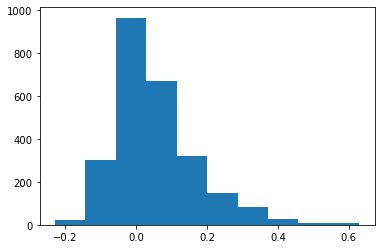

In [16]:
print("length ",len(outclus))
plt.hist(outclus)

length  2549


(array([  1.,  42.,  95., 238., 398., 535., 549., 432., 219.,  40.]),
 array([-0.2006012 , -0.09145151,  0.01769818,  0.12684788,  0.23599757,
         0.34514726,  0.45429695,  0.56344664,  0.67259633,  0.78174602,
         0.89089571]),
 <BarContainer object of 10 artists>)

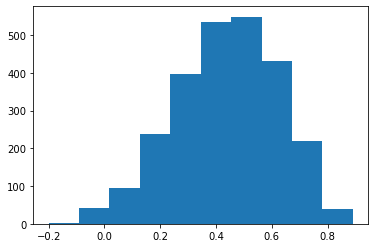

In [17]:
print("length ",len(inclus))
plt.hist(inclus)

In [2]:
d1 = pd.read_csv("indata_1.csv")
#print(len(d1))
dd = pd.read_csv("indata_2.csv")
#print(len(dd))
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
#print(len(d1))
dd = pd.read_csv("indata_3.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
#print(len(d1))
dd = pd.read_csv("indata_4.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
print(len(d1))


d2 = pd.read_csv("outdata_1.csv")
dd = pd.read_csv("outdata_2.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_3.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_4.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
print(len(d2))

10190
10195


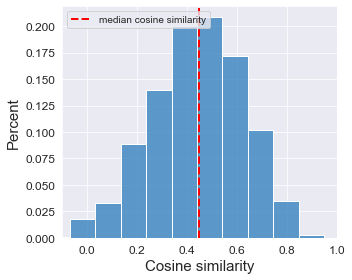

In [4]:
fig = plt.figure(figsize=(5,4))
sns.set_style('darkgrid')
sns.set_palette("Set2")
sns.histplot(data = d1, x = 'value', stat="probability", bins = 12, color = "#2b7bba")
plt.xlabel("Cosine similarity", fontsize = 15)
plt.ylabel("Percent", fontsize = 15)
plt.axvline(x = d1['value'].median(), color = "red", linestyle = "--",linewidth = 2,label="median cosine similarity")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="upper left")
plt.xlim([-0.1,1.0])
plt.tight_layout()
fig.savefig("in_cluster_similarity.png", dpi = 100)

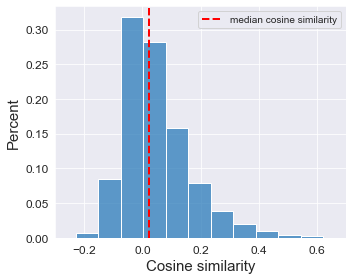

In [8]:
fig = plt.figure(figsize=(5,4))
sns.set_style('darkgrid')
sns.set_palette("Set2")
sns.histplot(data = d2, x = 'value', stat="probability", bins = 12, color = "#2b7bba")
plt.xlabel("Cosine similarity", fontsize = 15)
plt.axvline(x = d2['value'].median(), color = "red", linestyle = "--",linewidth = 2,label="median cosine similarity")
plt.ylabel("Percent", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="upper right")
plt.xlim([-0.3,0.7])
plt.tight_layout()
fig.savefig("out_cluster_similarity.png", dpi = 100)

(array([ 134., 1738., 4187., 2376., 1013.,  440.,  197.,   68.,   33.,
           9.]),
 array([-0.22982495, -0.13673779, -0.04365064,  0.04943651,  0.14252366,
         0.23561081,  0.32869796,  0.42178511,  0.51487226,  0.60795941,
         0.70104656]),
 <BarContainer object of 10 artists>)

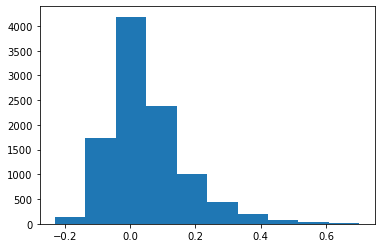

In [19]:
plt.hist(d2['value'])

(array([2.000e+00, 3.400e+01, 2.960e+02, 8.940e+02, 1.635e+03, 2.487e+03,
        2.457e+03, 1.660e+03, 6.630e+02, 6.200e+01]),
 array([-0.27168851, -0.14980873, -0.02792896,  0.09395082,  0.21583059,
         0.33771037,  0.45959015,  0.58146992,  0.7033497 ,  0.82522947,
         0.94710925]),
 <BarContainer object of 10 artists>)

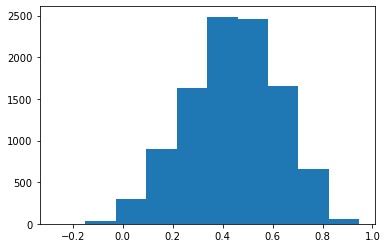

In [20]:
plt.hist(d1['value'])

In [13]:
hf = h5py.File('document_scores.h5', 'r')
x1 = hf['unique_IDF']
#art1 = 19420254
#art2 = 20936661

art1 = 27599104
art2 = 31600197

if art1 in data2:
    ref1 = data2.get(art1)
else:
    print("ohh no")
    
if art2 in data2:
    ref2 = data2.get(art2)
else:
    print("ohh no")

file1, file2 = "",""
if ref1 in data:
    file1 = data.get(ref1)
else:
    print("on no")
if ref2 in data:
    file2 = data.get(ref2)
else:
    print("on no")
            #print("file 1",file1)
bbc1 = x1[file1]
ff1 = bbc1['_ref']
ff1 = np.array(ff1)
loc1 = np.where(ff1==ref1)[0][0]
arr1 = bbc1['V'][loc1]
            #print(arr1)
            
bbc2 = x1[file2]
ff2 = bbc2['_ref']
ff2 = np.array(ff2)
loc2 = np.where(ff2==ref2)[0][0]
arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
a1 = arr1.reshape(1, -1)
a2 = arr2.reshape(1, -1)
cs2 = cosine_similarity(a1, a2)
print(cs2[0][0])
print(1.0-distance.cosine(a1, a2))

0.6283893060012357
0.6283893060012357


In [2]:
dd = pd.read_csv("idmap.csv")
print(dd.head(5))

    pmid  refid  cluster
0      1      0        7
1     10      1       21
2    100      2        8
3   1000      3        9
4  10000      4       10
